## Description of the project:

   In this assignment, we will curate a set of **CO2 measurements**, measured from cheap but inaccurate sensors, that have been deployed in the city of Zurich. The goal of the exercise is twofold: 

a) Learn how to deal with real world sensor timeseries data, and organize them efficiently using python dataframes.

b) Apply data science tools to model the measurements, and use the learned model to process them (e.g., detect outliers and drifts in the sensor measurements). 

The sensor network consists of 46 sites, located in different parts of the city. Each site contains three different sensors measuring (a) **CO2 concentration**, (b) **temperature**, and (c) **humidity**. Beside these measurements, we have the following additional information that can be used to process the measurements: 


1) The **altitude** at which the CO2 sensor is located, and the GPS coordinates (latitude, longitude).

2) A clustering of the city of Zurich in 17 different city zones and the **zone** in which the sensor belongs to. Some characteristic zones are industrial area, residential area, forest, glacier, lake, etc.



 Given this knowledge, you are asked to define an algorithm that curates the data, by detecting and removing potential drifts. The algorithm should be based on the fact that sensors in similar conditions are expected to have similar measurements. 




 
 






## Prior knowledge:
    
The average value of the CO2 in a city is approximately 400 ppm. However, the exact measurement in each site depends on parameters such as the temperature, the humidity, the altitude, and the level of traffic around the site. For example, sensors positioned in high altitude (mountains) and exposed to stronger winds, are expected to have a much lower and uniform level of CO2 than sensors that are positioned in a business area with much higher traffic activity. Moreover, we know that there is a strong dependence of the CO2 measurements on temperature and humidity.



### To start with: 

The following csv files will be needed: 

1) CO2_sensor_measurements.csv
    
   Description: It containts the CO2 measurements (CO2), the name of the site (LocationName), a unique sensor identifier (SensorUnit_ID), and the time instance in which the measurement was taken (timestamp).
    
2) temperature_humidity.csv

   Description: It contains the temperature and the humidity measurements for each sensor identifier, at each timestamp (Timestamp). For each SensorUnit_ID, the temperature and the humidity can be found in the corresponding columns of the dataframe (SensorUnit_ID.temperature, SensorUnit_ID.humidity).
    
3) sensor_metadata_updated.csv

   Description: It contains the name of the site (LocationName), the zone index (zone), the altitude in meters, and longitude, latitude. 
    



### PART I: Handling time series with pandas (10 points)

 a) **8/10** Merge the CO2_sensor_measurements.csv, temperature_humidity.csv files, and sensors_metadata.csv, into a single dataframe that contains as index the time instance (timestamp) of the measurements, and columns the location of the site (LocationName), the sensor ID (SensorUnit_ID), the CO2 measurement, the temperature, the humidity, the zone, the altitude, the longitude and the latitude. For each measurement, take the average over an interval of 30 min. If there are missing measurements, interpolate them linearly from measurements that are close by in time.

Hints: The following methods could be useful

    pandas.DataFrame.resample() https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html
    
    pandas.DataFrame.interpolate() https://pandas.pydata.org/pandasdocs/stable/generated/pandas.DataFrame.interpolate.html
    
    pandas.DataFrame.mean() https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html
    
    pandas.DataFrame.append() https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.append.html




b) **2/10** Export the curated and ready to use timeseries to a csv file. 

### PART II: Data visualization (20 points)

a) **6/20** Group the sites based on their altitude, by performing K-means clustering. Find the optimal number of clusters using the Elbow curve.  Add an additional column to the dataframe of the previous question indicating the altitude cluster index. 


b) **2/20** Plot the monthly median CO2 measurement for each site with respect to the altitude. Annotate each point of the plot with the name of the location (LocatioName), and give the same color to stations that belong to the same altitude  cluster.


    

c) **6/20** Plot the stations on an interactive Zurich map, and dispay their location name. You can use the python library Folium for that (https://pypi.org/project/folium/), but any other any visualization tool can be used.

d) **6/20** Plot a time-varying heatmap of the mean daily CO2 concentration for all the stations.  

### PART III: Model fitting for data curation (30 points)

a) **2/30** The technician in charge of these sensors reported that one of the CO2 sensors ('ZSBN') is exhibiting a drift on Oct. 21. Verify the drift by visualizing the CO2 concentration of the drifting sensor and some other random sensors from the network. 




b) **6/30** We want to reconstruct the CO2 concentration of the drifting sensor had the drift not happened. Train a forecasting model on the CO2 values of the drifting sensor. Use linear regression with features the past CO2 values over an interval of 3 hours. Plot and compare the actual CO2 measurements, and the values obtained by the prediction of the linear model for the entire month of October, together with their confidence interval obtained from cross validation.  What do you observe? 






c) **2/30** Train a second forecasting model on the CO2 values of the drifting sensor. In this step, include current values of temperature and humidity as features,  as well as their past values over the same interval of three hours. Plot and compare the actual CO2 measurements, the values obtained by the prediction of the linear model for the entire month of October, together with their confidence interval obtained from cross validation. Are you able to remove the drift? If yes, how, if no, why? 





d) **3/30** Train another forecasting model on the CO2 values of the drifting sensors. This time, use linear regression with features only temperature, and humidity (remove past values of CO2). Plot and compare the actual CO2 measurements, and the values obtained by the prediction of the linear model for the entire month of October,  together with their confidence interval obtained from cross validation. Try several training/validation ratios: 5%, 10%, 20%, 30%. Are you able to remove the drift? What do you observe?

e) **7/30** Build a better linear regression model by exploting the fact that the CO2 concentrations, as measured by the sensors experiencing similar conditions, are expected to be similar. Apply the learned model to the drifting sensor, and plot the results. Try several training/validation ratios: 5%, 10%, 20%, 30%. What do you conclude? 

f) **10/30** In this question, we will use Bayesian Structural Time Series modeling to reconstruct counterfactual values, that is, what the CO2 measurements of the faulty sensor should have been, had the malfunction not happened on October 21.  We will use the information of provided by similar sensors (the ones you identified in the previous question), together with the covariates associated with the faulty sensors that were not affected by the malfunction (such as temperature and humidity).

To answer this question, you can choose between a Python port of the CausalImpact package (such as https://github.com/dafiti/causalimpact) or the original R version (https://google.github.io/CausalImpact/CausalImpact.html) that you can run in your notebook via an R kernel (https://github.com/IRkernel/IRkernel).

Is the counterfactual reconstruction of CO2 measurements significantly different from the observed measurements? 


g) **Bonus (5):** Remove the drift with an advanced machine learning model of your choice. Discuss the results. 

# Relevant imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
import folium
import datetime as dt
from datetime import datetime, timedelta
from folium import plugins
import warnings
#from causalimpact import CausalImpact
# In order to use causalimpact run :
# pip install pycausalimpact

warnings.filterwarnings('ignore')

# PART I: Handling time series with pandas

## Reading the data

In [3]:
# Paths to the files
sensors_measurements_path = './CO2_sensor_measurements.csv'
sensors_metadata_path = './sensors_metadata_updated.csv'
temperature_humidity_path = './temperature_humidity.csv'

# Load the files:
sensors_measurements = pd.read_csv(sensors_measurements_path, sep='\t')
sensors_metadata = pd.read_csv(
    sensors_metadata_path).iloc[:, 1:]  #first column is just the index
temperature_humidity = pd.read_csv(temperature_humidity_path, sep='\t')

In [4]:
sensors_measurements['timestamp'] = pd.to_datetime(
    sensors_measurements['timestamp'].str.strip(), format='%Y-%m-%d %H:%M:%S')
sensors_measurements = sensors_measurements.set_index('timestamp')

In [5]:
sensors_measurements.head()

,LocationName,SensorUnit_ID,CO2
timestamp,,,
2017-10-01 00:05:00,ZGHD,1014,593.321562
2017-10-01 00:15:00,ZGHD,1014,595.846258
2017-10-01 00:25:00,ZGHD,1014,595.845353
2017-10-01 00:45:00,ZGHD,1014,599.039129
2017-10-01 00:55:00,ZGHD,1014,594.996629


In [6]:
temperature_humidity['Timestamp'] = pd.to_datetime(
    temperature_humidity['Timestamp'].str.strip(), format='%Y-%m-%d %H:%M:%S')
temperature_humidity = temperature_humidity.set_index('Timestamp')
temperature_humidity.head()

,1014.temperature,1014.humidity,1015.temperature,1015.humidity,1016.temperature,1016.humidity,1017.temperature,1017.humidity,1018.temperature,1018.humidity,...,1291.temperature,1291.humidity,1292.temperature,1292.humidity,1297.temperature,1297.humidity,1298.temperature,1298.humidity,1299.temperature,1299.humidity
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-10-01 00:00:00,11.39,92.262787,10.55,91.949982,11.02,92.613739,11.05,89.811844,11.38,91.427368,...,10.13,96.828979,10.50,95.858139,10.70,94.524902,11.35,90.288681,11.44,90.118927
2017-10-01 00:10:00,11.39,92.579407,10.48,92.079681,11.04,93.063873,11.05,90.042633,11.38,91.240448,...,10.12,97.322983,10.45,95.903915,10.53,94.395203,11.35,90.422195,11.46,90.073151
2017-10-01 00:20:00,11.41,92.480225,10.51,92.583221,11.06,93.201202,11.02,89.888138,11.35,90.511841,...,10.14,97.780746,10.43,95.343155,10.45,94.620270,11.33,91.023010,11.41,89.466614
2017-10-01 00:30:00,11.35,91.902298,10.55,92.714828,11.02,92.932266,10.96,89.790863,11.31,90.481323,...,10.13,97.904724,10.43,95.322174,10.42,94.973129,11.32,91.019196,11.39,89.249176
2017-10-01 00:40:00,11.30,91.639084,10.59,92.764420,10.99,92.598480,10.95,89.821381,11.27,89.668793,...,10.13,97.931427,10.48,96.451324,10.46,95.282120,11.28,90.443176,11.31,88.871521


In [7]:
sensors_metadata.head()

,LocationName,zone,altitude,LAT,LON,X,Y
0,AJGR,2,627.8,47.33321,8.480300,243005.0,678731.4
1,BSCR,2,462.3,47.35581,8.430070,245468.0,674903.4
2,BUDF,10,490.2,47.36270,8.433110,246237.5,675123.8
3,KBRL,7,510.5,47.32582,8.537550,242242.3,683070.1
4,KTGM,2,530.3,47.32334,8.596422,242031.0,687523.9


## Part a : Merge the files:

In [8]:
#Data Frames dictionary used later to seperate each sensor's measurements
dataframes = dict()
#Select distinct Sensors' IDs
ids = sensors_measurements['SensorUnit_ID'].unique()

**Here we noticed that for two sensors (the ones with IDs 1117 and 1174) we only had measurements starting from 19-10-2017. Since that for these we had significantly less data than the others we decided to treat them seperately.**

In [9]:
for id in ids:
    print(sensors_measurements.loc[(
        sensors_measurements['SensorUnit_ID'] == id)].head(1))

                    LocationName  SensorUnit_ID         CO2
timestamp                                                  
2017-10-01 00:05:00         ZGHD           1014  593.321562
                    LocationName  SensorUnit_ID         CO2
timestamp                                                  
2017-10-01 00:08:00         ZORL           1015  474.417613
           LocationName  SensorUnit_ID        CO2
timestamp                                        
2017-10-01         ZTBN           1016  439.57176
                    LocationName  SensorUnit_ID         CO2
timestamp                                                  
2017-10-01 00:03:00         ZHRG           1017  421.514557
                    LocationName  SensorUnit_ID         CO2
timestamp                                                  
2017-10-01 00:17:00         ZSCH           1018  421.982458
                    LocationName  SensorUnit_ID         CO2
timestamp                                                  
2017-10-01

In [10]:
# The indices of the units that have missing data
indices_missing_data = [1117, 1174]
# The indices of the units that have full data (from 1st to 30th october)
indices_full_data = [x for x in ids if x not in indices_missing_data]

In [11]:
# The locations corresponding to different Sensors
locations = sensors_measurements[['LocationName',
                                  'SensorUnit_ID']].reset_index().iloc[:, 1:]
locations = locations.drop_duplicates().reset_index().iloc[:, 1:]

**The main work is done here: We loop over the different sensors' IDs, we resample the timestamp to be every 10min and we linearly interpolate any missing value. We merge the sensors_measurements & temperature_humidity tables on identical IDs. We then take the mean of the measurements for every 30mins. We also concatenate the dataframes corresponding to each ID**

**We treat the sensors 1117 and 1174 outside the loop because of the reason explained above**

In [12]:
data = pd.DataFrame()
for index in indices_full_data:
    dataframes[index] = sensors_measurements.loc[(
        sensors_measurements['SensorUnit_ID'] == index)]
    dataframes[index] = dataframes[index].resample('10T').mean()
    dataframes[index]['temperature'] = temperature_humidity[str(index) +
                                                            '.temperature']
    dataframes[index]['humidity'] = temperature_humidity[str(index) +
                                                         '.humidity']
    dataframes[index] = dataframes[index].interpolate(method='linear')
    dataframes[index]['SensorUnit_ID'] = dataframes[index][
        'SensorUnit_ID'].astype(int)
    dataframes[index] = dataframes[index].resample('30T').mean()
    dataframes[index] = dataframes[index].reset_index()
    dataframes[index]['LocationName'] = locations.loc[(
        locations['SensorUnit_ID'] == index)].LocationName.values[0]
    data = pd.concat([data, dataframes[index]], axis=0)

In [13]:
dataframes[1117] = sensors_measurements.loc[(
    sensors_measurements['SensorUnit_ID'] == 1117)]
dataframes[1117] = dataframes[1117].resample('10T').mean()
dataframes[1117]['temperature'] = temperature_humidity[
    str(1117) + '.temperature'].loc['2017-10-19 13:40:00':]
dataframes[1117]['humidity'] = temperature_humidity[
    str(1117) + '.humidity'].loc['2017-10-19 13:40:00':]
dataframes[1117] = dataframes[1117].interpolate(method='linear')
dataframes[1117]['SensorUnit_ID'] = dataframes[1117]['SensorUnit_ID'].astype(
    int)
dataframes[1117] = dataframes[1117].resample('30T').mean()
dataframes[1117] = dataframes[1117].reset_index()
dataframes[1117]['LocationName'] = 'ZHRO'
data = pd.concat([data, dataframes[1117]], axis=0, sort=True)

In [14]:
dataframes[1174] = sensors_measurements.loc[(
    sensors_measurements['SensorUnit_ID'] == 1174)]
dataframes[1174] = dataframes[1174].resample('10T').mean()
dataframes[1174]['temperature'] = temperature_humidity[
    str(1174) + '.temperature'].loc['2017-10-19 13:10:00':]
dataframes[1174]['humidity'] = temperature_humidity[
    str(1174) + '.humidity'].loc['2017-10-19 13:11:00':]
dataframes[1174] = dataframes[1174].interpolate(method='linear')
dataframes[1174]['SensorUnit_ID'] = dataframes[1174]['SensorUnit_ID'].astype(
    int)
dataframes[1174] = dataframes[1174].resample('30T').mean()
dataframes[1174] = dataframes[1174].reset_index()
dataframes[1174]['LocationName'] = 'ZPFW'
data = pd.concat([data, dataframes[1174]], axis=0, sort=True)

In [15]:
data = data.merge(
    sensors_metadata[['LocationName', 'zone', 'altitude', 'LAT', 'LON']],
    how='inner',
    on='LocationName')
data = data.set_index('timestamp')
data.head()

,CO2,LocationName,SensorUnit_ID,humidity,temperature,zone,altitude,LAT,LON
timestamp,,,,,,,,,
2017-10-01 00:00:00,595.004391,ZGHD,1014,92.440806,11.396667,2,413.5,47.370446,8.523256
2017-10-01 00:30:00,597.159333,ZGHD,1014,91.625097,11.303333,2,413.5,47.370446,8.523256
2017-10-01 01:00:00,596.487010,ZGHD,1014,91.096761,11.240000,2,413.5,47.370446,8.523256
2017-10-01 01:30:00,598.787639,ZGHD,1014,91.275734,11.260000,2,413.5,47.370446,8.523256
2017-10-01 02:00:00,596.223366,ZGHD,1014,91.003937,11.285000,2,413.5,47.370446,8.523256


## Part b : Export the data as a csv file

In [16]:
data.to_csv('./cleaned_data.csv')

# PART II: Data Visualization

## Part a

Group the sites based on their altitude, by performing K-means clustering. Find the optimal number of clusters using the Elbow curve. Add an additional column to the dataframe of the previous question indicating the altitude cluster index.

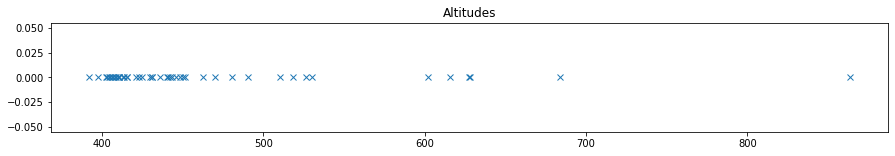

In [17]:
#Data to cluster (altitudes)
X = np.array(sensors_metadata['altitude'])
plt.figure(figsize=(15, 2))
#plt.axis('off')
plt.plot(X, np.zeros_like(X), 'x')
plt.title('Altitudes')
plt.show()
#print(X.reshape(-1,1))

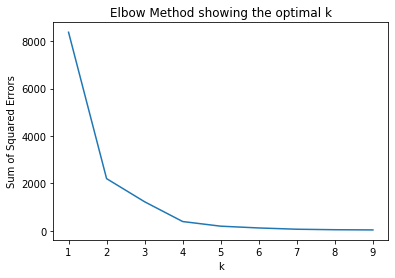

In [18]:
SumSquaredErrors = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X.reshape(-1, 1))
    SumSquaredErrors.append(
        np.sum(np.min(np.square(X - kmeanModel.cluster_centers_), axis=0)) /
        X.shape[0])

# Plot the elbow
plt.plot(K, SumSquaredErrors)
plt.xlabel('k')
plt.ylabel('Sum of Squared Errors')
plt.title('Elbow Method showing the optimal k')
plt.show()

**We see that the "Elbow" value is k=4, so we can say that the optimal number of clusters is 4.**

In [19]:
kmeans = KMeans(n_clusters=4)
data['cluster'] = kmeans.fit_predict(data[['altitude']])

## Part b

Plot the monthly median CO2 measurement for each site with respect to the altitude. Annotate each point of the plot with the name of the location (LocatioName), and give the same color to stations that belong to the same altitude cluster.

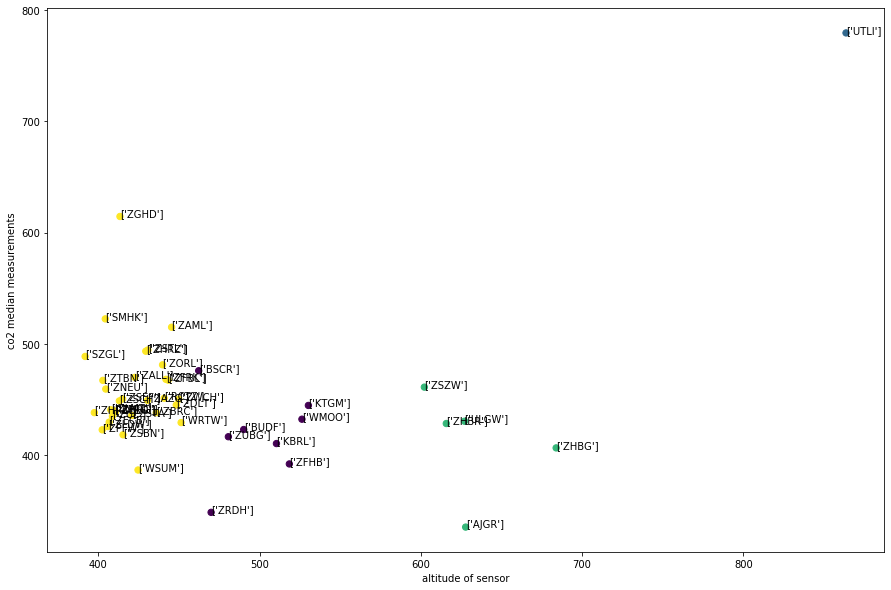

In [20]:
plt.figure(figsize=(15, 10))
co2_medians = data.groupby(
    data.LocationName)[['CO2']].median().sort_values(by=['LocationName'])
altitude = data[['LocationName', 'altitude']].drop_duplicates().set_index(
    ['LocationName']).sort_values(by=['LocationName'])
colors = np.array(data[['LocationName',
                        'cluster']].drop_duplicates().set_index(
                            ['LocationName']).sort_values(by=['LocationName']))
names = np.array(data[['LocationName']].drop_duplicates().sort_values(
    by=['LocationName']).reset_index().drop(columns=['timestamp']))
plt.scatter(altitude, co2_medians, c=colors, s=40)
for i, txt in enumerate(names):
    plt.annotate(txt, (altitude.iloc[i], co2_medians.iloc[i]))
plt.ylabel("co2 median measurements")
plt.xlabel("altitude of sensor")

plt.show()

## Part c

Plot the stations on an interactive Zurich map, and dispay their location name. You can use the python library Folium for that (https://pypi.org/project/folium/), but any other any visualization tool can be used.

In [21]:
m = folium.Map(location=[47.370446, 8.523256], zoom_start=12)

sensors_info = np.array(
    data[['LocationName', 'LAT',
          'LON']].drop_duplicates().reset_index().drop(columns=['timestamp']))
for i, info in enumerate(sensors_info):
    folium.Marker(
        location=[info[1], info[2]],
        popup=info[0],
        icon=folium.Icon(color='red', icon='info-sign')).add_to(m)
m

## Part d

Plot a time-varying heatmap of the mean daily CO2 concentration for all the stations.

In [21]:
#  Create time inidices from 1st october to the 31st for the heatmap indices
time_index = [
    (data.index[0].to_pydatetime() + k * timedelta(1)).strftime('%Y-%m-%d')
    for k in range(31)
]

In [22]:
m = folium.Map(location=[47.370446, 8.523256], zoom_start=11)

heat_data = data.reset_index()
heat_data['timestamp'] = heat_data['timestamp'].dt.date

# Transform the date to indices from 1 to 31 cause easier to loop through them.
heat_data['timestamp'] = (heat_data.timestamp).rank(method='dense').astype(int)
heat_data = heat_data.groupby(['timestamp', 'LAT',
                               'LON'])[['CO2']].mean().reset_index()
# This method needs a list of lists of lists
# More info here : https://www.kaggle.com/daveianhickey/how-to-folium-for-maps-heatmaps-time-data
result = [[[
    row['LAT'], row['LON'], row['CO2']
] for index, row in heat_data.loc[(heat_data['timestamp'] == i)].iterrows()]
          for i in range(1, 32)]

# Create the heatmap
hm = plugins.HeatMapWithTime(
    result, index=time_index, radius=25, auto_play=False, max_opacity=0.8)
hm.add_to(m)
# Display the map
m

# PART III: Model fitting for data curation

## Part a

The technician in charge of these sensors reported that one of the CO2 sensors ('ZSBN') is exhibiting a drift on Oct. 24. Verify the drift by visualizing the CO2 concentration of the drifting sensor and some other random sensors from the network.

In [23]:
data = pd.read_csv('cleaned_data.csv')
data.head(5)

,timestamp,CO2,LocationName,SensorUnit_ID,humidity,temperature,zone,altitude,LAT,LON
0,2017-10-01 00:00:00,595.004391,ZGHD,1014,92.440806,11.396667,2,413.5,47.370446,8.523256
1,2017-10-01 00:30:00,597.159333,ZGHD,1014,91.625097,11.303333,2,413.5,47.370446,8.523256
2,2017-10-01 01:00:00,596.487010,ZGHD,1014,91.096761,11.240000,2,413.5,47.370446,8.523256
3,2017-10-01 01:30:00,598.787639,ZGHD,1014,91.275734,11.260000,2,413.5,47.370446,8.523256
4,2017-10-01 02:00:00,596.223366,ZGHD,1014,91.003937,11.285000,2,413.5,47.370446,8.523256


In [54]:
#Selecting data on 24th of October
data['timestamp'] = pd.to_datetime(data['timestamp'])
data_october_24 = data[data['timestamp'].dt.month == 10]
data_october_24 = data_october_24[data['timestamp'].dt.day == 24]

# Get the data for the sensor suspected of drifting
data_drifting_sensor = data_october_24[data_october_24['LocationName'] ==
                                       'ZSBN']

#Selecting random location sensors
locations = data['LocationName'].unique()
locations = locations[locations!='ZSBN']
locations = locations[np.random.randint(0, len(locations), size=10)]

data_random_sensor_1 = data_october_24[data_october_24['LocationName'] ==
                                       locations[0]]
data_random_sensor_2 = data_october_24[data_october_24['LocationName'] ==
                                       locations[1]]
data_random_sensor_3 = data_october_24[data_october_24['LocationName'] ==
                                       locations[2]]
data_random_sensor_4 = data_october_24[data_october_24['LocationName'] ==
                                       locations[3]]
data_random_sensor_5 = data_october_24[data_october_24['LocationName'] ==
                                       locations[4]]
data_random_sensor_6 = data_october_24[data_october_24['LocationName'] ==
                                       locations[5]]
data_random_sensor_7 = data_october_24[data_october_24['LocationName'] ==
                                       locations[6]]
data_random_sensor_8 = data_october_24[data_october_24['LocationName'] ==
                                       locations[7]]
data_random_sensor_9 = data_october_24[data_october_24['LocationName'] ==
                                       locations[8]]
data_random_sensor_10 = data_october_24[data_october_24['LocationName'] ==
                                        locations[9]]

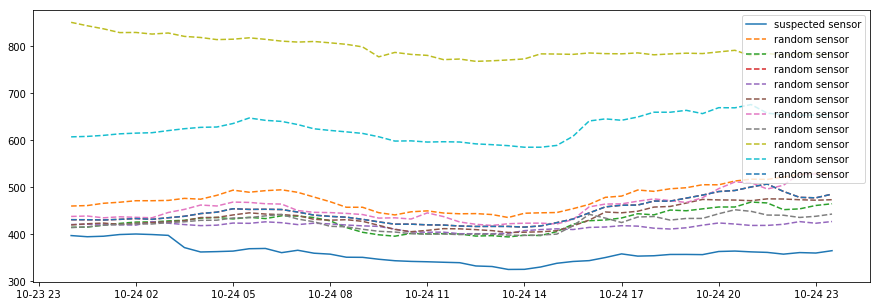

In [57]:
#Plotting the CO2 measures
plt.figure(figsize=(15, 5))
plt.plot(data_drifting_sensor['timestamp'], data_drifting_sensor['CO2'],
         data_random_sensor_1['timestamp'], data_random_sensor_1['CO2'], '--',
         data_random_sensor_2['timestamp'], data_random_sensor_2['CO2'], '--',
         data_random_sensor_3['timestamp'], data_random_sensor_3['CO2'], '--',
         data_random_sensor_4['timestamp'], data_random_sensor_4['CO2'], '--',
         data_random_sensor_5['timestamp'], data_random_sensor_5['CO2'], '--',
         data_random_sensor_6['timestamp'], data_random_sensor_6['CO2'], '--',
         data_random_sensor_7['timestamp'], data_random_sensor_7['CO2'], '--',
         data_random_sensor_8['timestamp'], data_random_sensor_8['CO2'], '--',
         data_random_sensor_9['timestamp'], data_random_sensor_9['CO2'], '--',
         data_random_sensor_10['timestamp'], data_random_sensor_10['CO2'],
         '--')
plt.legend(
    ('suspected sensor', 'random sensor', 'random sensor', 'random sensor',
     'random sensor', 'random sensor', 'random sensor', 'random sensor',
     'random sensor', 'random sensor', 'random sensor'),
    loc='upper right');

**As we can see, the sensor on 'ZSBN' clearly drifted, reporting results that are significantly lower than the results of the other randomly chosen sensors.**

## Part b

We want to reconstruct the CO2 concentration of the drifting sensor had the drift not happened. Train a forecasting model on the CO2 values of the drifting sensor. Use linear regression with features the past CO2 values over an interval of 3 hours. Plot and compare the actual CO2 measurements, and the values obtained by the prediction of the linear model for the entire month of October, together with their confidence interval obtained from cross validation.  What do you observe? 

#### HELPERS FUNCTIONS

In [26]:
def select_features(data, humidity=False, temperature=False, CO_2=True):
    "This is a helper functions to select the feature we want to include in out model"

    dataframe = data[data['LocationName'] == 'ZSBN'].copy().reset_index()
    dataframe = dataframe.drop(columns=['index'])

    if (CO_2 == True):
        dataframe['CO2_1'] = 0.0
        dataframe['CO2_2'] = 0.0
        dataframe['CO2_3'] = 0.0
        dataframe['CO2_4'] = 0.0
        dataframe['CO2_5'] = 0.0
        dataframe['CO2_6'] = 0.0
        for index in dataframe.index:
            if (index >= 6):
                dataframe.loc[index, 'CO2_1'] = dataframe.loc[index - 6, 'CO2']
                dataframe.loc[index, 'CO2_2'] = dataframe.loc[index - 5, 'CO2']
                dataframe.loc[index, 'CO2_3'] = dataframe.loc[index - 4, 'CO2']
                dataframe.loc[index, 'CO2_4'] = dataframe.loc[index - 3, 'CO2']
                dataframe.loc[index, 'CO2_5'] = dataframe.loc[index - 2, 'CO2']
                dataframe.loc[index, 'CO2_6'] = dataframe.loc[index - 1, 'CO2']

    if (temperature == True):
        dataframe['temperature_1'] = 0.0
        dataframe['temperature_2'] = 0.0
        dataframe['temperature_3'] = 0.0
        dataframe['temperature_4'] = 0.0
        dataframe['temperature_5'] = 0.0
        dataframe['temperature_6'] = 0.0
        for index in dataframe.index:
            if (index >= 6):
                dataframe.loc[index, 'temperature_1'] = dataframe.loc[
                    index - 6, 'temperature']
                dataframe.loc[index, 'temperature_2'] = dataframe.loc[
                    index - 5, 'temperature']
                dataframe.loc[index, 'temperature_3'] = dataframe.loc[
                    index - 4, 'temperature']
                dataframe.loc[index, 'temperature_4'] = dataframe.loc[
                    index - 3, 'temperature']
                dataframe.loc[index, 'temperature_5'] = dataframe.loc[
                    index - 2, 'temperature']
                dataframe.loc[index, 'temperature_6'] = dataframe.loc[
                    index - 1, 'temperature']

    if (humidity == True):
        dataframe['humidity_1'] = 0.0
        dataframe['humidity_2'] = 0.0
        dataframe['humidity_3'] = 0.0
        dataframe['humidity_4'] = 0.0
        dataframe['humidity_5'] = 0.0
        dataframe['humidity_6'] = 0.0
        for index in dataframe.index:
            if (index >= 6):
                dataframe.loc[index, 'humidity_1'] = dataframe.loc[index - 6,
                                                                   'humidity']
                dataframe.loc[index, 'humidity_2'] = dataframe.loc[index - 5,
                                                                   'humidity']
                dataframe.loc[index, 'humidity_3'] = dataframe.loc[index - 4,
                                                                   'humidity']
                dataframe.loc[index, 'humidity_4'] = dataframe.loc[index - 3,
                                                                   'humidity']
                dataframe.loc[index, 'humidity_5'] = dataframe.loc[index - 2,
                                                                   'humidity']
                dataframe.loc[index, 'humidity_6'] = dataframe.loc[index - 1,
                                                                   'humidity']

    # Get rid of rows with no past CO2 values
    dataframe = dataframe.iloc[6:]

    return dataframe


def train_test_split_ts(X, y, test_size=0.3):
    "This is a helper function that does the split of training and testing sets without any shuffling"

    split_index = len(X) - int(len(X) * test_size)
    return X[:split_index], X[split_index:], y[:split_index], y[split_index:]


def plot_actual_vs_prediction(X, y, timestamps, test_size=0.3):
    "This is a helper functions to plot the predicted values vs the actual ones"

    # Split train and test sets without shuffle
    X_train, X_test, y_train, y_test = train_test_split_ts(X, y, test_size)

    # Create model and compute predictions for the entire month of october
    reg = LinearRegression().fit(X_train, y_train)
    prediction = reg.predict(X)

    # Plot predictions vs actual values
    plt.figure(figsize=(20, 10))
    pred, = plt.plot(
        timestamps, prediction, "g", label="prediction", linewidth=1)
    act, = plt.plot(timestamps, y.values, "r", label="actual", linewidth=1)

    # Compute and then plot confidence interval bounds
    cv = cross_val_score(
        reg,
        X,
        y,
        cv=TimeSeriesSplit(n_splits=3),
        scoring="neg_mean_squared_error")
    deviation = np.sqrt(cv.std())
    lower = prediction - (1.96 * deviation)
    upper = prediction + (1.96 * deviation)
    lower_upper, = plt.plot(
        timestamps, lower, "b--", label="upper bound / lower bound", alpha=0.3)
    plt.plot(timestamps, upper, "b--", alpha=0.3)

    plt.axvline(
        x=data.iloc[len(X) - int(len(X) * test_size), 0],
        linewidth=1,
        color='r')
    plt.annotate(
        'End of training',
        xy=(data.iloc[len(X) - int(len(X) * test_size), 0], 600),
        xycoords='data',
        xytext=(data.iloc[len(X) - int(len(X) * (test_size + 0.2)), 0], 600),
        arrowprops=dict(arrowstyle="->"))

    plt.axvline(x=pd.Timestamp('20171024'), linewidth=1)
    plt.annotate(
        'The start of october, 24th',
        xy=(pd.Timestamp('20171024'), 550),
        xycoords='data',
        xytext=(pd.Timestamp('20171026'), 550),
        arrowprops=dict(arrowstyle="->"))

    plt.xlabel('Time range indices')
    plt.ylabel('CO2 level')

    plt.legend(handles=[lower_upper, pred, act], loc=1)

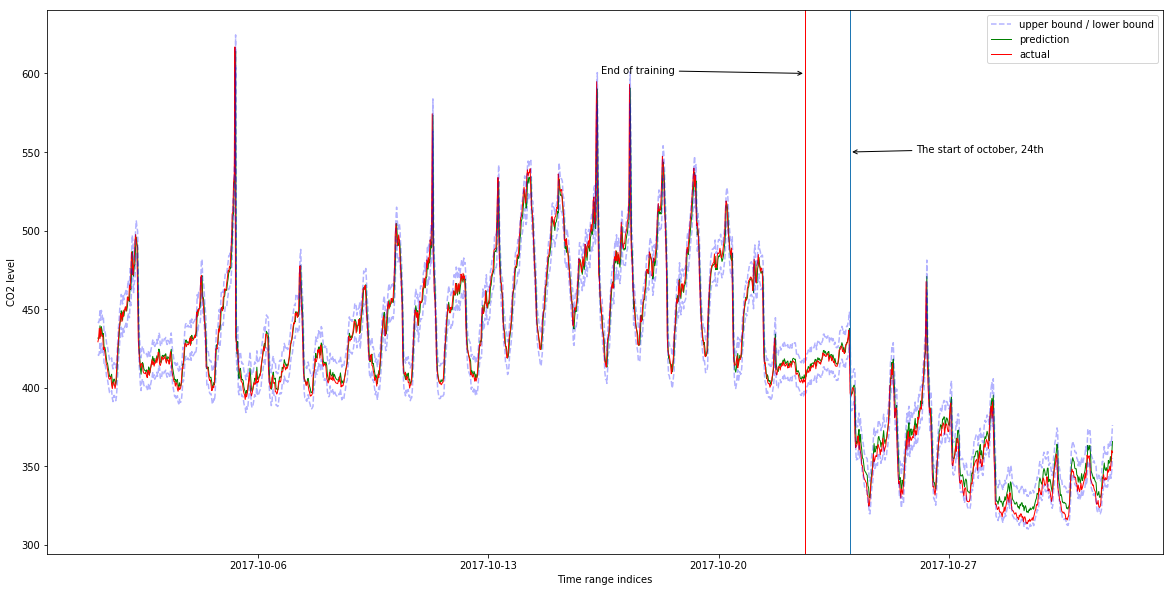

In [27]:
#Building training data
dataframe = select_features(data)

X = dataframe[['CO2_1', 'CO2_2', 'CO2_3', 'CO2_4', 'CO2_5', 'CO2_6']]
y = dataframe['CO2']
plot_actual_vs_prediction(X, y, dataframe.timestamp.unique())

**We observe here that the predicted values based on the three past hours measures follow almost exactly the same path as the sensor's values. Therefore, this model doesn't help much in recovering from the drift.**

## Part c

Train a second forecasting model on the CO2 values of the drifting sensor. In this step, include current values of temperature and humidity as features,  as well as their past values over the same interval of three hours. Plot and compare the actual CO2 measurements, the values obtained by the prediction of the linear model for the entire month of October, together with their confidence interval obtained from cross validation
Are you able to remove the drift? If yes, how, if no, why? 

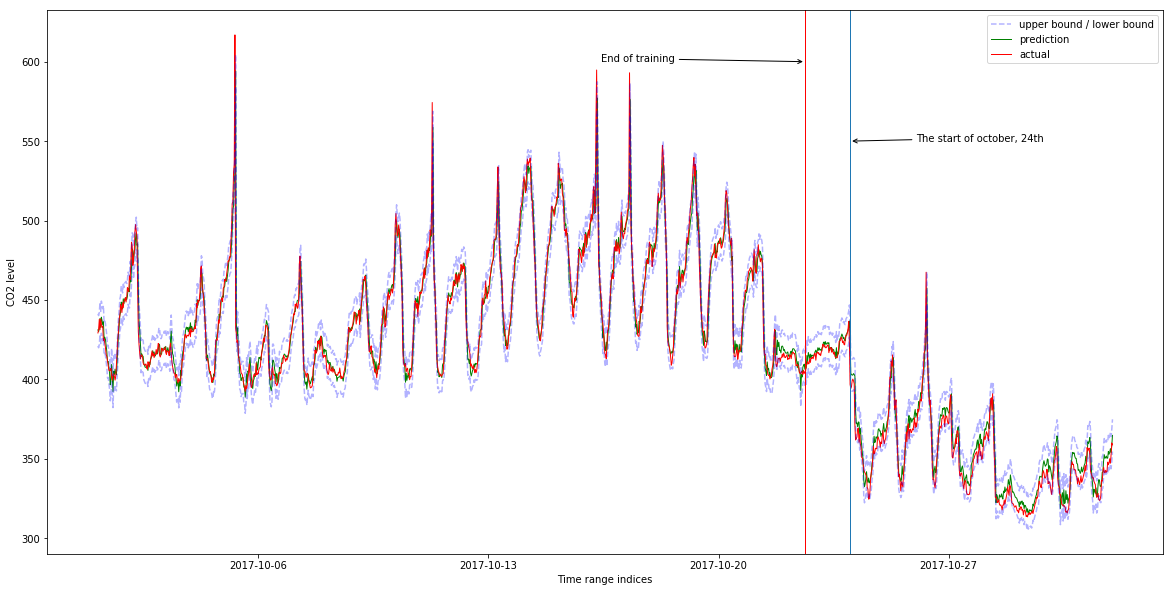

In [28]:
#Building training data
dataframe = select_features(data, temperature=True, humidity=True, CO_2=True)

X = dataframe[[
    'CO2_1', 'CO2_2', 'CO2_3', 'CO2_4', 'CO2_5', 'CO2_6', 'humidity',
    'humidity_1', 'humidity_2', 'humidity_3', 'humidity_4', 'humidity_5',
    'humidity_6', 'temperature', 'temperature_1', 'temperature_2',
    'temperature_3', 'temperature_4', 'temperature_5', 'temperature_6'
]]
y = dataframe['CO2']
X_train, X_test, y_train, y_test = train_test_split_ts(X, y)

plot_actual_vs_prediction(X, y, dataframe.timestamp.unique())

**No, we were not able to remove the drift. This is due to the fact that our machine learning model relies heavily on the past CO2 values to predict the future outcome as we can see from the correlation table here.**

In [29]:
X['y'] = y
corr = X.corr()
corr[['y']].T

,CO2_1,CO2_2,CO2_3,CO2_4,CO2_5,CO2_6,humidity,humidity_1,humidity_2,humidity_3,...,humidity_5,humidity_6,temperature,temperature_1,temperature_2,temperature_3,temperature_4,temperature_5,temperature_6,y
y,0.885753,0.908455,0.930042,0.949074,0.967701,0.98481,0.382584,0.260363,0.292652,0.321702,...,0.365686,0.378073,-0.022094,0.053623,0.027055,0.004742,-0.012478,-0.023549,-0.027027,1.0


## Part d

Train another forecasting model on the CO2 values of the drifting sensors. This time, use linear regression with features only temperature, and humidity (remove past values of CO2). Plot and compare the actual CO2 measurements, and the values obtained by the prediction of the linear model for the entire month of October, together with their confidence interval obtained from cross validation. Try several training/validation ratios: 5%, 10%, 20%, 30%. Are you able to remove the drift? What do you observe?

### Training/validation ratios: 5%

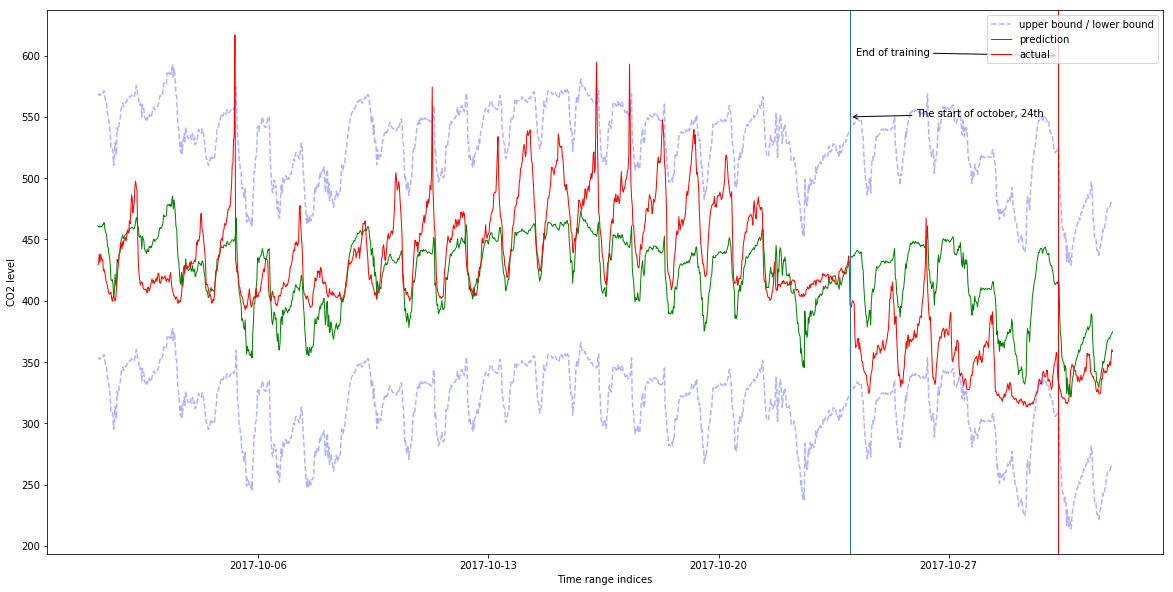

In [30]:
#Building training data
dataframe = select_features(data, temperature=True, humidity=True, CO_2=False)
X = dataframe[[
    'humidity', 'humidity_1', 'humidity_2', 'humidity_3', 'humidity_4',
    'humidity_5', 'humidity_6', 'temperature', 'temperature_1',
    'temperature_2', 'temperature_3', 'temperature_4', 'temperature_5',
    'temperature_6'
]]
y = dataframe['CO2']
plot_actual_vs_prediction(X, y, dataframe.timestamp.unique(), test_size=0.05)

### Training/validation ratios: 10%

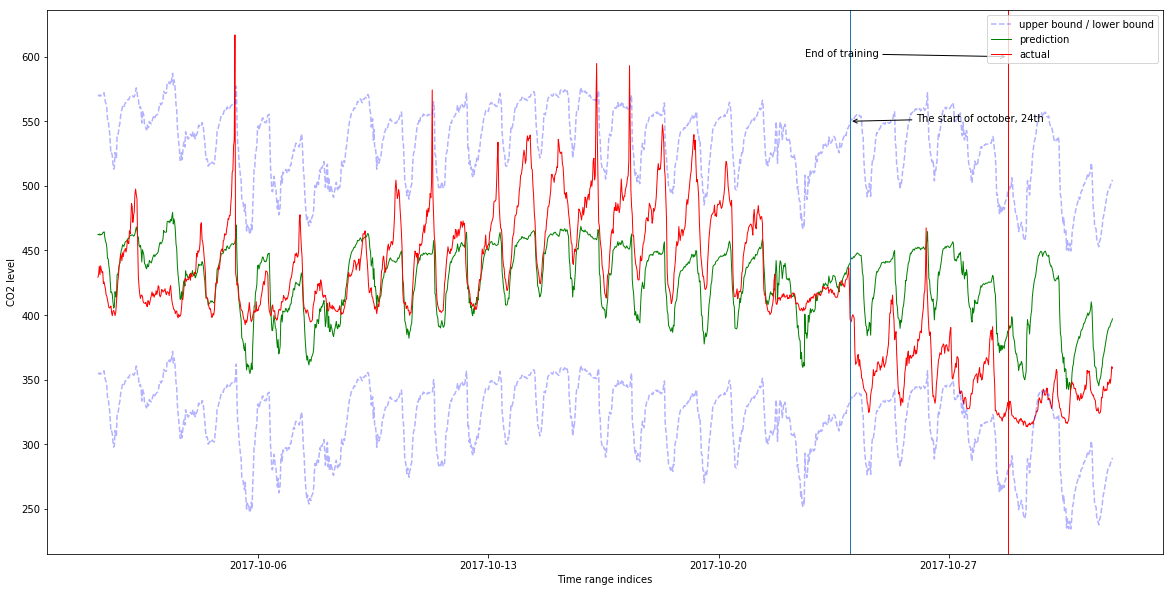

In [31]:
plot_actual_vs_prediction(X, y, dataframe.timestamp.unique(), test_size=0.1)

### Training/validation ratios: 20%

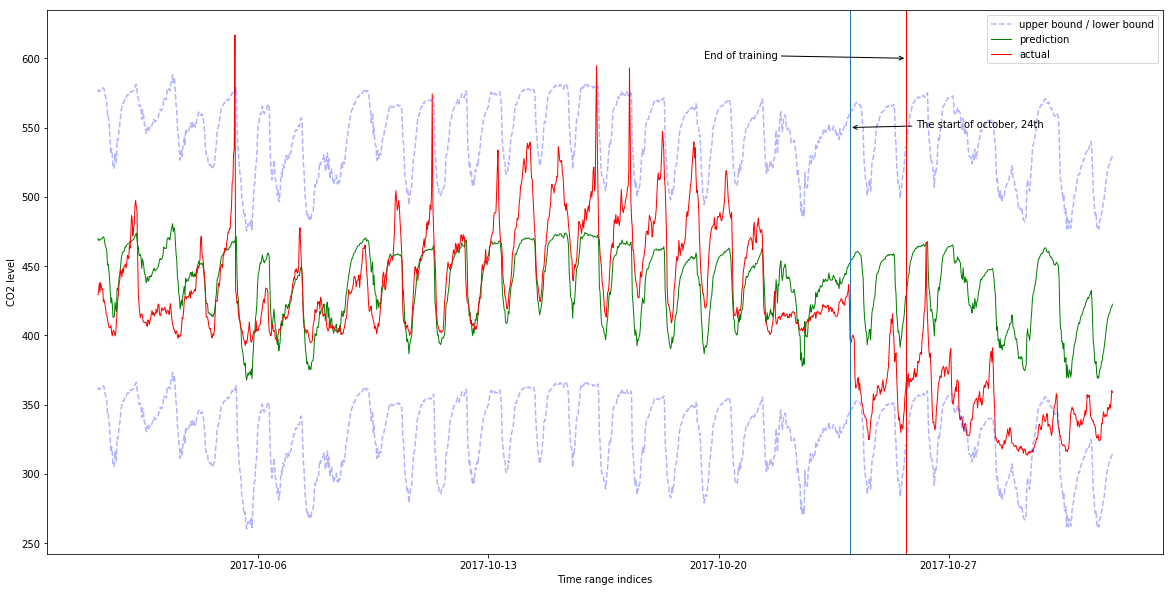

In [32]:
plot_actual_vs_prediction(X, y, dataframe.timestamp.unique(), test_size=0.2)

### Training/validation ratios: 30%

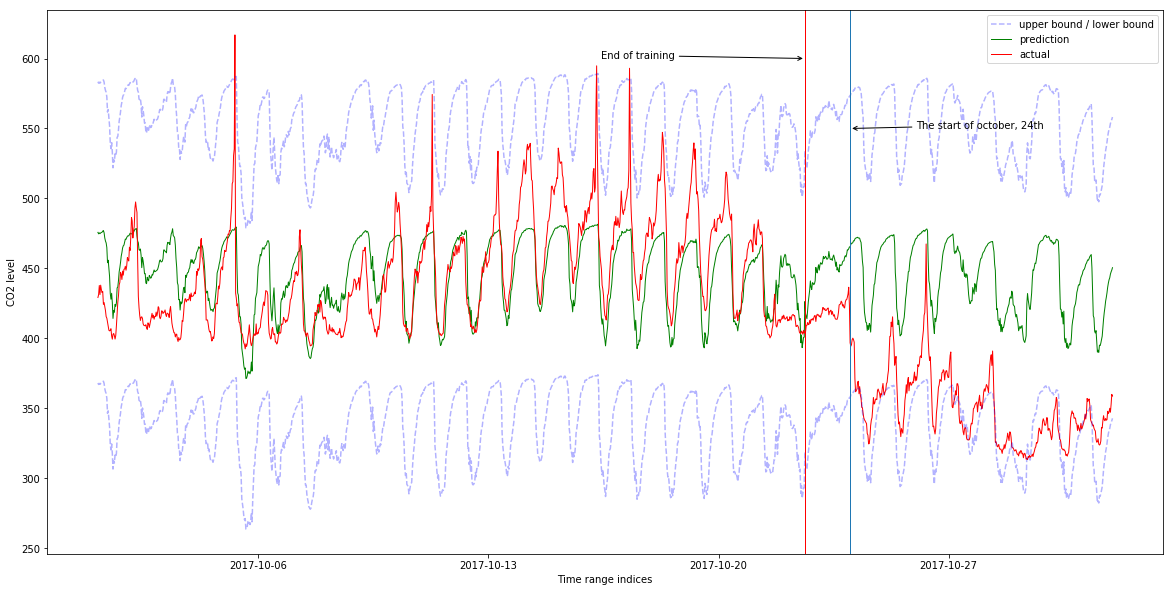

In [33]:
plot_actual_vs_prediction(X, y, dataframe.timestamp.unique(), test_size=0.3)

**If we look at the CO2 value at the start of October, 24th where the vertical line lays , we can see that the actual measure witnessed a strange drop but the predicted value didn't. In fact, the model was capable of removing the drift since it predicted higher values which are more likely to be the correct ones as we saw for the different sensors plotted in question 1.**

## Part e

Build a better linear regression model by exploting the fact that the CO2 concentrations, as measured by the sensors experiencing similar conditions, are expected to be similar. Apply the learned model to the drifting sensor, and plot the results. Try several training/validation ratios: 5%, 10%, 20%, 30%. What do you conclude? 

In [34]:
def select_k_closest_regions(data, k=5):
    'This is a helper function to select the k regions with the same weather conditions as ZSBN '
    weather_conditions = data[[
        'LocationName', 'humidity', 'temperature', 'CO2', 'altitude'
    ]]
    weather_conditions = weather_conditions.groupby(by='LocationName').mean()
    weather_conditions.reset_index(inplace=True)
    ZSBN_mean = weather_conditions[weather_conditions['LocationName'] ==
                                   'ZSBN']
    weather_conditions['humidity'] = weather_conditions['humidity'] - float(
        ZSBN_mean['humidity'])
    weather_conditions['temperature'] = weather_conditions[
        'temperature'] - float(ZSBN_mean['temperature'])
    weather_conditions['CO2'] = weather_conditions['CO2'] - float(
        ZSBN_mean['CO2'])
    weather_conditions['altitude'] = weather_conditions['altitude'] - float(
        ZSBN_mean['altitude'])
    weather_conditions[
        'error'] = weather_conditions['humidity']**2 + weather_conditions[
            'temperature']**2 + weather_conditions[
                'CO2']**2 + weather_conditions['altitude']**2
    weather_conditions.sort_values(by=['error'], inplace=True)
    #     Use 1 to k+1 cause the first one is obviously ZSBN
    return weather_conditions[['LocationName', 'error']][1:k + 1]

In [35]:
select_k_closest_regions(data, k=10)

,LocationName,error
29,ZLDW,297.827887
33,ZPFW,568.237625
19,ZECB,667.337813
12,WSUM,850.816116
39,ZSTA,973.797830
34,ZPRD,1023.205333
16,ZBLG,1051.175266
44,ZUE,1114.263738
30,ZLMT,1185.355473
26,ZHRG,1190.719576


**let's use regions that have error < 1000 ==> k = 5**

In [36]:
closest_regions = list(select_k_closest_regions(data, k=5)['LocationName'])
closest_regions

['ZLDW', 'ZPFW', 'ZECB', 'WSUM', 'ZSTA']

**Now we create our features dataframe that has the CO2 values from the closest regions and the target list which contains the CO2 values of ZSBN that we want to predict**

In [37]:
data[data['LocationName'] == 'ZSBN'].shape

(1488, 10)

In [38]:
features = data[data['LocationName'] == 'ZSBN'][['timestamp']]
targets = data[data['LocationName'] == 'ZSBN'][['CO2']]
for location in closest_regions:
    if (location != 'ZPFW'):
        #     We checked before hand that the whole data (from october 1st to 31st)
        data_tomerge = data[data['LocationName'] == location][[
            'timestamp', 'CO2'
        ]]
        features = pd.merge(features, data_tomerge, on='timestamp')

features = features.drop(columns=['timestamp'])
features.head()

,CO2_x,CO2_y,CO2_x,CO2_y
0,410.988983,418.430031,419.172551,409.986208
1,412.826743,419.191297,422.965613,412.134272
2,413.304853,419.286677,421.486211,413.270622
3,415.102117,418.800550,416.887221,411.528196
4,415.913092,421.304153,418.834719,415.458255


### Training/validation ratios: 5% 

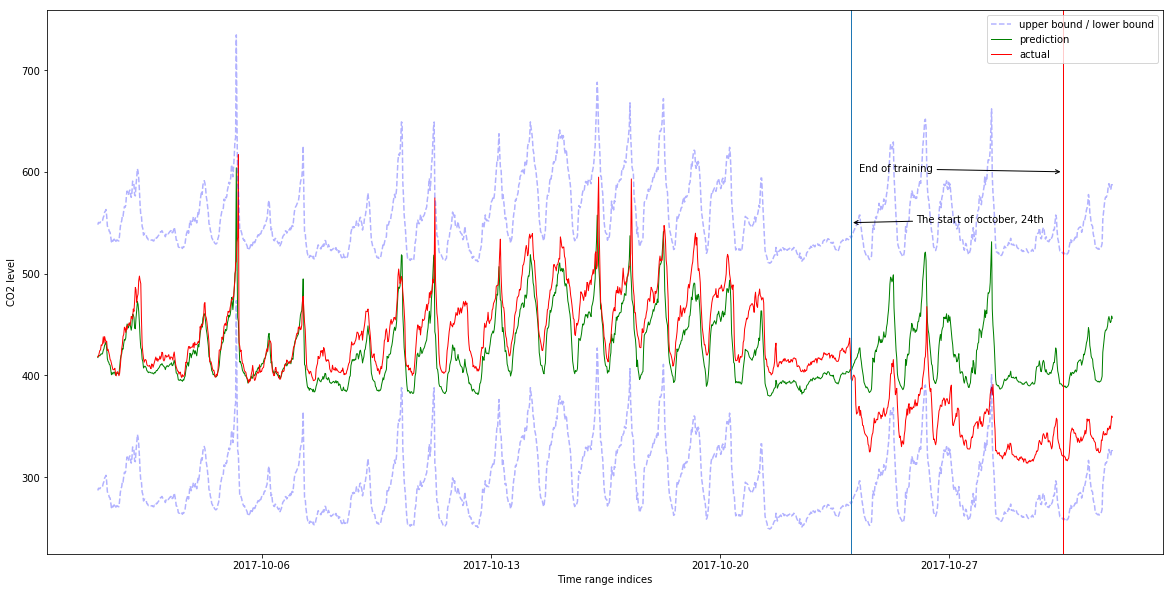

In [39]:
plot_actual_vs_prediction(
    features,
    targets,
    data[data['LocationName'] == 'ZSBN']['timestamp'].unique(),
    test_size=0.05)

### Training/validation ratios: 10% 

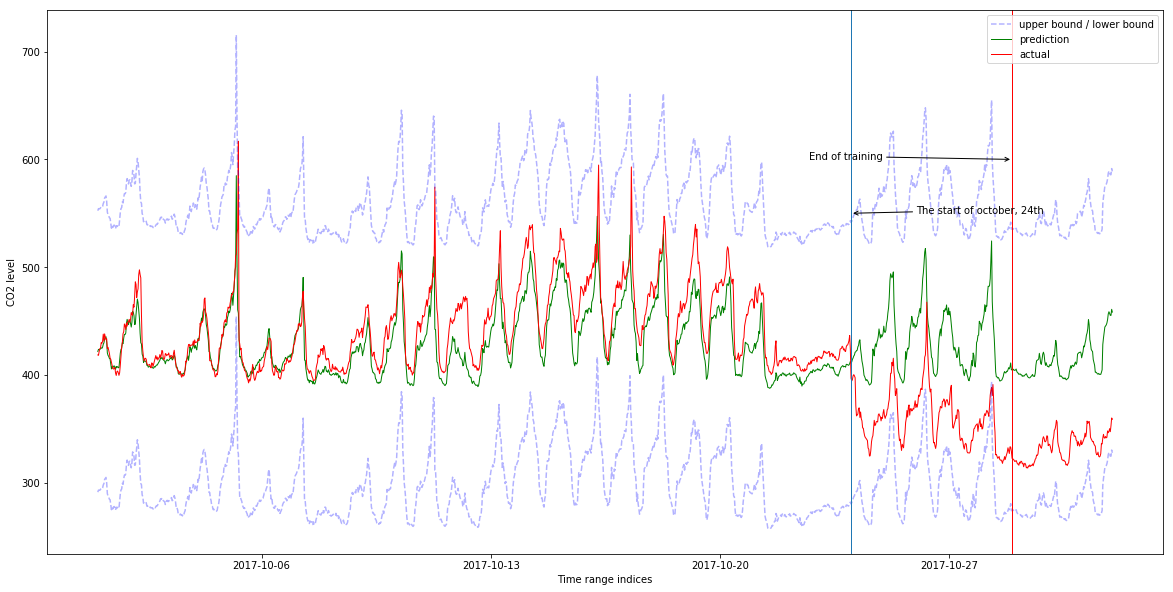

In [40]:
plot_actual_vs_prediction(
    features,
    targets,
    data[data['LocationName'] == 'ZSBN']['timestamp'].unique(),
    test_size=0.10)

### Training/validation ratios: 20% 

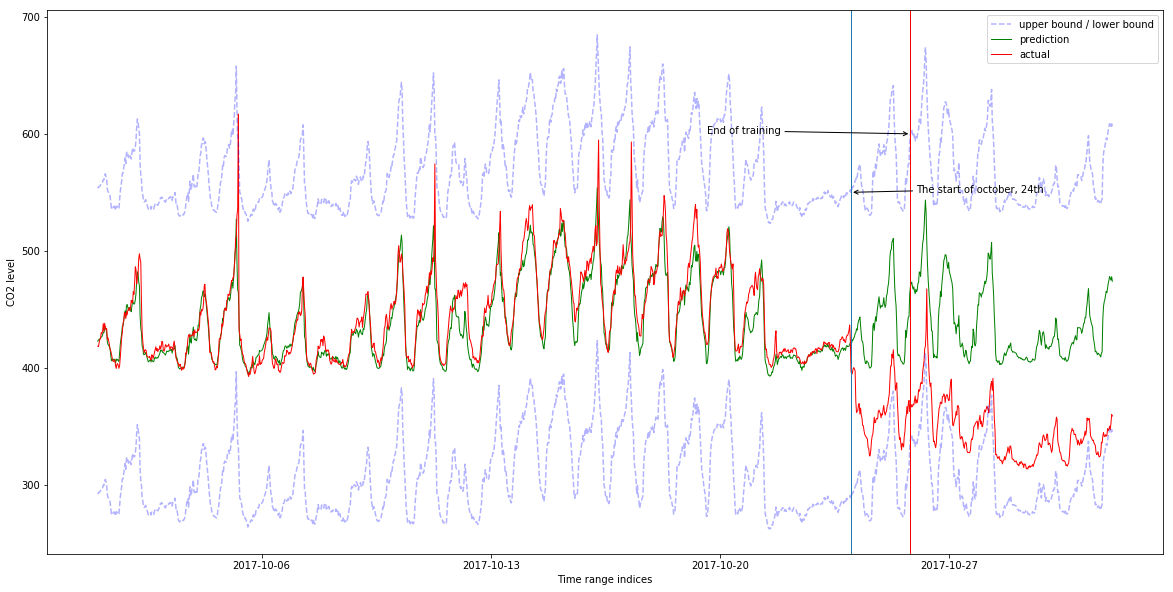

In [41]:
plot_actual_vs_prediction(
    features,
    targets,
    data[data['LocationName'] == 'ZSBN']['timestamp'].unique(),
    test_size=0.20)

### Training/validation ratios: 30% 

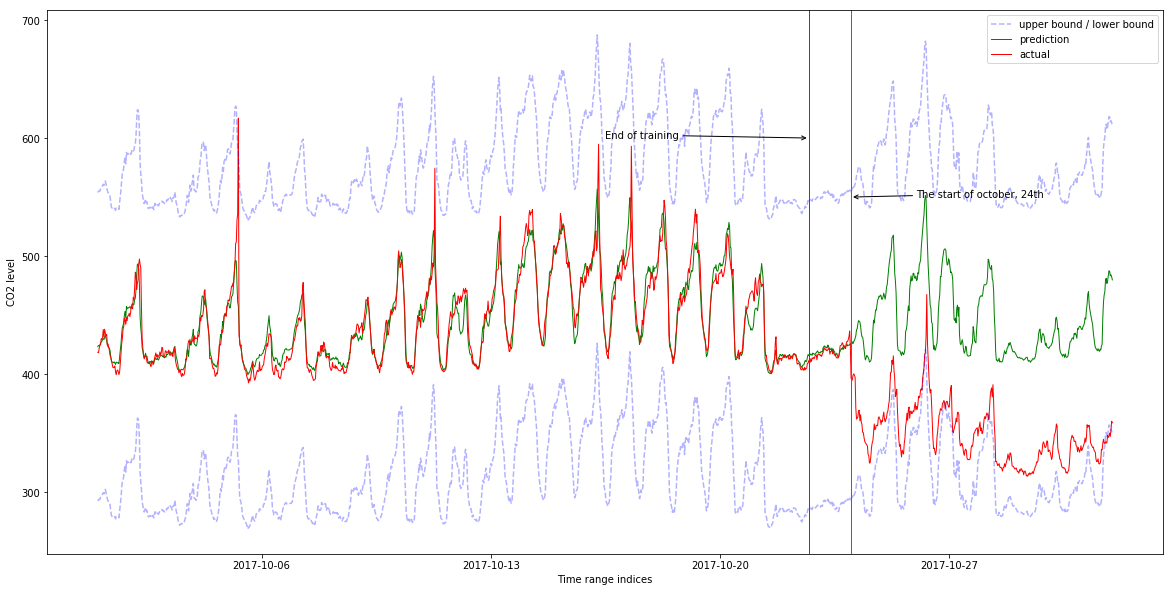

In [42]:
plot_actual_vs_prediction(
    features,
    targets,
    data[data['LocationName'] == 'ZSBN']['timestamp'].unique(),
    test_size=0.30)

**This seems to be the best forecasting model. As we can see in the plot, the drift is completely fixed. Also, the unlikely measures represented by peaks are correctly predicted.**

**Varying the split ratios doesn't significantly influence the model results. For all values of split ratios, it is still capable of predicting appropriate values and removing the drift. This can be explained by the fact that the CO2 data doesn't have large variance. Even based on small amounts of data, the model remains powerful enough to predict and correct the drift.**

## Part f

f) 10/30 In this question, we will use Bayesian Structural Time Series modeling to reconstruct counterfactual values, that is, what the CO2 measurements of the faulty sensor should have been, had the malfunction not happened on October 21. We will use the information of provided by similar sensors (the ones you identified in the previous question), together with the covariates associated with the faulty sensors that were not affected by the malfunction (such as temperature and humidity).

To answer this question, you can choose between a Python port of the CausalImpact package (such as https://github.com/dafiti/causalimpact) or the original R version (https://google.github.io/CausalImpact/CausalImpact.html) that you can run in your notebook via an R kernel (https://github.com/IRkernel/IRkernel).

Is the counterfactual reconstruction of CO2 measurements significantly different from the observed measurements?

In [43]:
features = data[data['LocationName'] == 'ZSBN'][[
    'timestamp', 'humidity', 'temperature'
]]
targets = data[data['LocationName'] == 'ZSBN'][['CO2']]

for location in closest_regions:
    #     We checked before hand that the whole data (from october 1st to 31st)
    if (location != 'ZPFW'):
        data_tomerge = data[data['LocationName'] == location][[
            'timestamp', 'CO2'
        ]]
        features = pd.merge(features, data_tomerge, on='timestamp')

features = features.set_index('timestamp')
features.index = pd.to_datetime(features.index)
features.head()

,humidity,temperature,CO2_x,CO2_y,CO2_x,CO2_y
timestamp,,,,,,
2017-10-01 00:00:00,92.608017,11.146667,410.988983,418.430031,419.172551,409.986208
2017-10-01 00:30:00,92.220825,10.915000,412.826743,419.191297,422.965613,412.134272
2017-10-01 01:00:00,92.662059,10.860000,413.304853,419.286677,421.486211,413.270622
2017-10-01 01:30:00,92.934809,10.820000,415.102117,418.800550,416.887221,411.528196
2017-10-01 02:00:00,93.407832,10.760000,415.913092,421.304153,418.834719,415.458255


In [44]:
columns = ['x' + str(i) for i in range(len(features.columns))]
features.columns = columns
features.insert(loc=0, column='y', value=targets['CO2'].values)
features.head()

,y,x0,x1,x2,x3,x4,x5
timestamp,,,,,,,
2017-10-01 00:00:00,418.493079,92.608017,11.146667,410.988983,418.430031,419.172551,409.986208
2017-10-01 00:30:00,418.169200,92.220825,10.915000,412.826743,419.191297,422.965613,412.134272
2017-10-01 01:00:00,421.749522,92.662059,10.860000,413.304853,419.286677,421.486211,413.270622
2017-10-01 01:30:00,424.363039,92.934809,10.820000,415.102117,418.800550,416.887221,411.528196
2017-10-01 02:00:00,424.868258,93.407832,10.760000,415.913092,421.304153,418.834719,415.458255


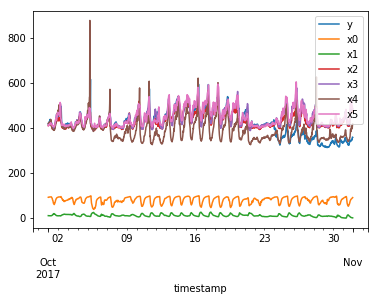

In [45]:
features.plot()

In [46]:
pre_period = ['2017-10-01 00:00:00', '2017-10-23 23:30:00']
post_period = ['2017-10-24 00:00:00', '2017-10-31 23:30:00']

ci = CausalImpact(features, pre_period, post_period)

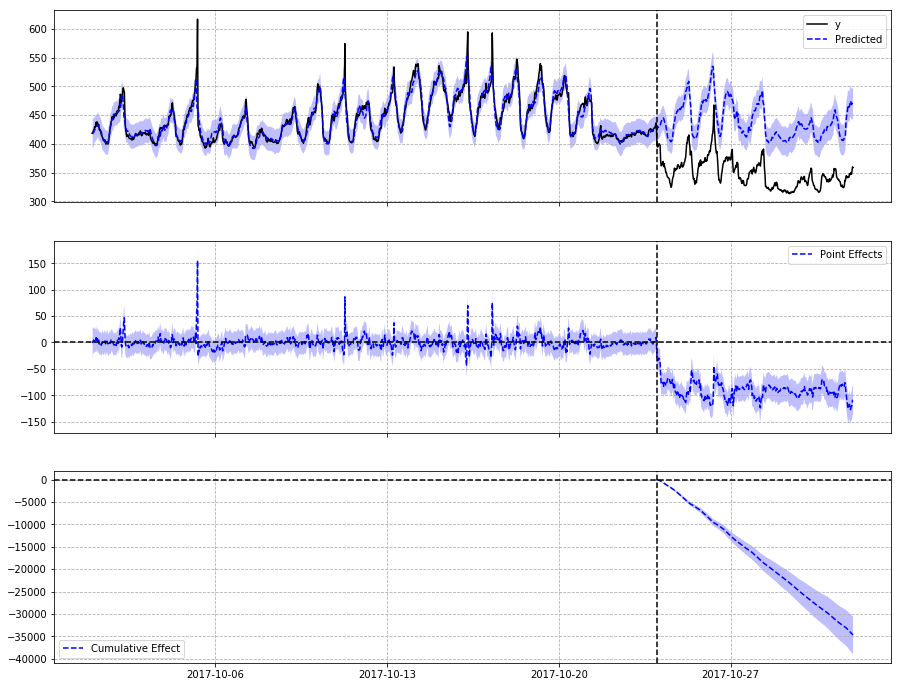

In [47]:
ci.plot()

**Yes, the counterfactual reconstruction of CO2 measurements significantly different from the observed measurements. This helps us in recovering the measurements in the case where the sensor drifts and starts giving false measurements**

In [48]:
print(ci.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    349.4              134171.7
Prediction (s.d.)         439.8 (5.6)        168884.7 (2159.4)
95% CI                    [428.9, 450.9]     [164681.4, 173146.0]

Absolute effect (s.d.)    -90.4 (5.6)        -34713.0 (2159.4)
95% CI                    [-101.5, -79.5]    [-38974.3, -30509.8]

Relative effect (s.d.)    -20.6% (1.3%)      -20.6% (1.3%)
95% CI                    [-23.1%, -18.1%]   [-23.1%, -18.1%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.00%

For more details run the command: print(impact.summary('report'))


In [49]:
ci.trained_model.params

sigma2.irregular    0.080129
sigma2.level        0.000144
beta.x0             0.196935
beta.x1             0.079816
beta.x2             0.126736
beta.x3             0.470466
beta.x4             0.101505
beta.x5             0.134512
dtype: float64